# Music Recommender System


-  One of the most used machine learning algorithms is recommendation systems. A recommender (or recommendation) system (or engine) is a filtering system whose aim is to predict a rating or preference a user would give to an item, eg. a film, a product, a song, etc.  

### -  This project is aimed upon building a music recommendation system that gives the user recommendations on music based on his music taste by analysing his previously heard music and playlist.


Data Files provided are:-
* kaggle_songs.txt
* kaggle_users.txt
* kaggle_visible_evaluation_triplets.txt
* taste_profile_song_to_tracks.txt
* unique_tracks.txt

### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Data Exploration
To start off, we load and examine the dataset.

In [3]:
triplets=pd.read_table(r"C:\Users\rohit\Documents\data\kaggle\kaggle_visible_evaluation_triplets.txt")
triplets.head()

,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1


In [4]:
triplets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450932 entries, 0 to 1450931
Data columns (total 3 columns):
 #   Column                                    Non-Null Count    Dtype 
---  ------                                    --------------    ----- 
 0   fd50c4007b68a3737fe052d5a4f78ce8aa117f3d  1450932 non-null  object
 1   SOBONKR12A58A7A7E0                        1450932 non-null  object
 2   1                                         1450932 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


In [5]:
triplets.columns

Index(['fd50c4007b68a3737fe052d5a4f78ce8aa117f3d', 'SOBONKR12A58A7A7E0', '1'], dtype='object')

In [6]:
### Renaming the columns with standardized names.

In [7]:
triplets=triplets.rename(columns={'fd50c4007b68a3737fe052d5a4f78ce8aa117f3d':'user_id','SOBONKR12A58A7A7E0':'song_id','1':'listen_count'})

In [8]:
# frequency=no of times listened.

triplets

,user_id,song_id,listen_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1
...,...,...,...
1450927,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [9]:
triplets.shape

(1450932, 3)

In [10]:
unique_tracks=pd.read_csv(r"C:\Users\rohit\Documents\data\kaggle\unique_tracks.txt", sep='<SEP>',names=['track_id','song_id','artist_name','song_name'] )

In [11]:
unique_tracks

,track_id,song_id,artist_name,song_name
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos QuerÃ©s
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


In [12]:
songs=pd.read_csv(r"C:\Users\rohit\Documents\data\kaggle\kaggle_songs.txt", names=['song_id'])

In [13]:
songs

,song_id
0,SOAAADD12AB018A9DD 1
1,SOAAADE12A6D4F80CC 2
2,SOAAADF12A8C13DF62 3
3,SOAAADZ12A8C1334FB 4
4,SOAAAFI12A6D4F9C66 5
...,...
386208,SOZZZRJ12AB0187A75 386209
386209,SOZZZRV12A8C1361F1 386210
386210,SOZZZSR12AB01854CD 386211
386211,SOZZZWD12A6D4F6624 386212


In [14]:
users=pd.read_csv(r"C:\Users\rohit\Documents\data\kaggle\kaggle_users.txt", names=['user_id'])

In [15]:
users

,user_id
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8
...,...
109995,07f2f354a2a4390624e0d04e4a555ef67e98f673
109996,fe752b1aa2a12dbc203c37b70881d88481c655f1
109997,ab79461415bb9db956def3a897886d0754ddddfb
109998,fc072bde2043756ea30ff07e4a5311e34825b4df


In [16]:
print(triplets.shape)
print(unique_tracks.shape)

(1450932, 3)
(1000000, 4)


### Merging triplets data set with unique_tracks data based on song_id. So, that it gives the data of all song_id's by merging data containing same song_id into one

In [17]:
df=pd.merge(triplets,unique_tracks,on='song_id')
df

,user_id,song_id,listen_count,track_id,artist_name,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
1,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,7c49f3e11a6fce79ae60b44df2a3edcf6eb2e163,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
3,8061f61372876878c2d67bc49b3ddbd2c83d69e2,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,d47c829c4ff6270f9ab82ca36b2805951b62a208,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
...,...,...,...,...,...,...
1491946,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,TRZHWHD128F42B9D11,Our Broken Garden,The Blinding
1491947,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,TRNBQWA128F145DB74,Emilio,Como A Nadie
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,TRIWGAI12903CDF710,Morbid Angel,Victorious March Of Reign The Conqueror
1491949,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,TRMPODL128F4228DE1,Gus Gus,Call of the Wild


### Dropping track_id column as both song_id and track_id represents similar features.

In [18]:
df.drop('track_id', axis=1, inplace=True)

In [19]:
df

,user_id,song_id,listen_count,artist_name,song_name
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
1,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,7c49f3e11a6fce79ae60b44df2a3edcf6eb2e163,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
3,8061f61372876878c2d67bc49b3ddbd2c83d69e2,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
4,d47c829c4ff6270f9ab82ca36b2805951b62a208,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
...,...,...,...,...,...
1491946,9d2f78e2bda5a004879d3ee53ee7de5cdf99c730,SOIDWNE12A8C13E669,1,Our Broken Garden,The Blinding
1491947,987b654b09b239f7c47751e0cfaa2990834cbb55,SOATNWN12A6D4F826F,1,Emilio,Como A Nadie
1491948,987b654b09b239f7c47751e0cfaa2990834cbb55,SOGMCFE12AB018A3A1,3,Morbid Angel,Victorious March Of Reign The Conqueror
1491949,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBAOTU12A6D4F7A68,1,Gus Gus,Call of the Wild


In [20]:
df.shape

(1491951, 5)

In [21]:
df.dtypes

user_id         object
song_id         object
listen_count     int64
artist_name     object
song_name       object
dtype: object

### Checking out Missing values and duplicates values present in given data files.
(DATA WRANGLING)//(MISSING VALUE TREATMENT)

In [22]:
print(sum(df.isnull().any()))

1


In [23]:
print(sum(triplets.duplicated()))

0


In [24]:
print(sum(unique_tracks.duplicated()))

0


In [25]:
print(sum(songs.duplicated()))

0


In [26]:
print(sum(unique_tracks["song_id"].duplicated()))

944


### Checking for list of features along with count of null values

In [27]:
print(df.isna().sum(), '\n')
print('percentage of null values'"\n\n",df.isna().sum()/len(df)*100)

user_id         0
song_id         0
listen_count    0
artist_name     0
song_name       1
dtype: int64 

percentage of null values

 user_id         0.000000
song_id         0.000000
listen_count    0.000000
artist_name     0.000000
song_name       0.000067
dtype: float64


-  Removing null values from the dataset is one of the important steps in data wrangling. These null values adversely affect the performance and accuracy of any machine learning algorithm. So, it is very important to remove null values from the dataset before applying any machine learning algorithm to that dataset.

### We see that song_name column contains 1 null value out of 1491951 rows / observations. 
### So, it is better to drop that row from the dataset. Lets drop it.

In [28]:
df.dropna(axis=0,how='any',inplace=True)

In [29]:
df.shape

(1491950, 5)

### Now dataset does not contain any null value. This step is not recommended but just for illustration we do it.

In [30]:
print(df.isna().sum(),"\n")
print('percentage of null values'"\n\n",df.isna().sum()/len(df)*100)

user_id         0
song_id         0
listen_count    0
artist_name     0
song_name       0
dtype: int64 

percentage of null values

 user_id         0.0
song_id         0.0
listen_count    0.0
artist_name     0.0
song_name       0.0
dtype: float64


In [31]:
print('Total no.of songs :',df['song_id'].nunique())
print('Total no.of users :',df['user_id'].nunique())

Total no.of songs : 163205
Total no.of users : 110000


In [32]:
print('Total no.of points :',df.shape[0])

Total no.of points : 1491950


### Checking for duplicates in dataset.

In [33]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1491946    False
1491947    False
1491948    False
1491949    False
1491950    False
Length: 1491950, dtype: bool

### Dropping duplicate values from dataset

In [34]:
df.drop_duplicates(keep='first', inplace=True)

In [35]:
df.shape

(1456563, 5)

### Calculating the percent share of each song in listen_count.

In [36]:
df['percentage'] = df['listen_count'].div(df['listen_count'].sum())*100

In [37]:
df['percentage']

0          0.000022
1          0.000022
2          0.000022
3          0.000022
4          0.000022
             ...   
1491946    0.000022
1491947    0.000022
1491948    0.000065
1491949    0.000022
1491950    0.000022
Name: percentage, Length: 1456563, dtype: float64

### Sorting the dataset with respect to listen_count

In [38]:
df=df.sort_values('listen_count',ascending = True)
df

,user_id,song_id,listen_count,artist_name,song_name,percentage
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.000022
893572,23614884aa75fe96d99a36a775aeda1b531830b2,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero,0.000022
893574,d2e8d8aeb220950b4ddfc7c5e648d439a9965eed,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero,0.000022
893575,ff499594b217036334d3b300e03f9c61ae7b9df9,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero,0.000022
893576,40f25f9031233352e9e9c5d2e52aaae4dafd1ba9,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero,0.000022
...,...,...,...,...,...,...
1424225,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537,Us3,Believe In Yourself,0.011572
526513,69ad6b6a1d14d740eb8c2f013a19c1f8048cecde,SONGOJV12AF729AEBD,582,Queen,Somebody To Love,0.012542
641625,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597,Ms. Dynamite / Kymani Marley,Seed Will Grow,0.012865
679629,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646,The Beach Boys,What Is a Young Girl Made of,0.013921


### Calculating the minimum frequency of a song.

In [39]:
df['listen_count'].min()

1

### Calculating the maximum frequency of a song.

In [40]:
df['listen_count'].max()

923

### No of songs listened per user

In [41]:
songs_per_user=df.groupby(['user_id'])['listen_count'].sum()
songs_per_user

user_id
00007a02388c208ea7176479f6ae06f8224355b3     13
00014a76ed063e1a749171a253bca9d9a0ff1782     24
00015189668691680bb1a2e58afde1541ec92ced    101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     12
00020fcd8b01986a6a85b896ccde6c49f35142ad     44
                                           ... 
fffdef71f13352e9cff769f1d96f5ccf90f8955e     10
fffe29116f96c97b47a5dabdd406784ad0ba6f30     10
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    108
fffed0bee753cd78494011b8b55dafd4f5c7e5ff     76
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee     42
Name: listen_count, Length: 110000, dtype: int64

In [42]:
songs_per_user.sort_values().head()

user_id
89b07df379827a871fb1e991e14f0918bf4ebc6b    5
342bf803141c8a84ccb04dae940477d8621ac73a    5
fa6894e991dba63dd2d5c5465c1e0f77ab62770b    5
717d34613ad93f04ea187a0fbe444561e96d1c84    5
dc152fb9b0b72648dc10e6ed6effb3b148aa316a    5
Name: listen_count, dtype: int64

In [43]:
songs_per_user.sort_values().tail()

user_id
5a9375e46a7e9b869058c7bc0e820e00d77f3e0b    1184
c6150292374fb1dad89982367b3245dd5004c718    1192
1c5aa998482a40abfd020759e7d757eb6c510e72    1200
938c2632d43eeadb8a83a7cc254d014f9cea6afe    1280
090b841eaf56d343a26625c2c6d08b823927bc4f    1305
Name: listen_count, dtype: int64

-  Maximum songs listened per user are 1305 & Minimum songs listened per user are 5

In [44]:
df['user_id'].value_counts(ascending=True)

ffe6adab8edbd3f53230e34379b063419396e319     5
f3bda5d9e5653f396c2e34978d97580685a5effe     5
fd0347d74ccd77d126be0bac8ecdf6be0c707e60     5
ee309f8860b23319d96cc8519b23756461bdbb41     5
ac0c62138c645bb59140ed8ae35cb16948f178c9     5
                                            ..
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    53
7d90be8dfdbde170f036ce8a4b915440137cb11c    53
0f8308935bcbb9a1e04ebb7c4d41c037e5f23b90    53
Name: user_id, Length: 110000, dtype: int64

In [45]:
popular_df=df.sort_values(by='listen_count', ascending=False).head(100)
popular_df

,user_id,song_id,listen_count,artist_name,song_name,percentage
1491875,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version),0.019890
679629,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646,The Beach Boys,What Is a Young Girl Made of,0.013921
641625,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597,Ms. Dynamite / Kymani Marley,Seed Will Grow,0.012865
526513,69ad6b6a1d14d740eb8c2f013a19c1f8048cecde,SONGOJV12AF729AEBD,582,Queen,Somebody To Love,0.012542
1424225,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537,Us3,Believe In Yourself,0.011572
...,...,...,...,...,...,...
32686,28caa9baa2203b0b3d97f9e51f17965cf26ff7e4,SOBONKR12A58A7A7E0,234,Dwight Yoakam,You're The One,0.005043
1434654,5a9375e46a7e9b869058c7bc0e820e00d77f3e0b,SOVEEDI12AB0180CDF,233,Zoegirl,Unchangeable,0.005021
1334068,4f6c9e7181bc4160566f351d160e5105b0a516f7,SOZIJPB12A6D4FA6BB,232,Quique Gonzalez,Salitre,0.004999
1300128,5e9f00a9a8a1db20ddc9dd7354422ff8e957308a,SOFPXSN12A6D4F6BD1,232,Righteous Brothers,Georgia On My Mind,0.004999


### No.of unique artists

In [46]:
print("total no.of artists are :",df['artist_name'].nunique())

total no.of artists are : 28366


### List of unique artists

In [47]:
df['artist_name'].unique()

array(['Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner',
       'Frou Frou', 'Nickel Creek', ..., 'Mousse T.',
       'Giuseppe Di Stefano', 'The Family Stand'], dtype=object)

### List of unique songs

In [48]:
df['song_name'].unique()

array(['Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)',
       'Holding Out For A Hero', 'Speak', ..., 'SyntymÃ¤pÃ¤ivÃ¤',
       'Believe In Yourself', 'Drop The Hammer (Album Version)'],
      dtype=object)

### No of unique songs

In [49]:
df['song_name'].nunique()

137674

### Top 100 popular artists and songs.

In [50]:
popular_df=df[['artist_name','listen_count','song_name']]

popular_df.sort_values(by='listen_count',ascending=False).head(100)

,artist_name,listen_count,song_name
1491875,Kilgore,923,Drop The Hammer (Album Version)
679629,The Beach Boys,646,What Is a Young Girl Made of
641625,Ms. Dynamite / Kymani Marley,597,Seed Will Grow
526513,Queen,582,Somebody To Love
1424225,Us3,537,Believe In Yourself
...,...,...,...
32686,Dwight Yoakam,234,You're The One
1434654,Zoegirl,233,Unchangeable
1334068,Quique Gonzalez,232,Salitre
1300128,Righteous Brothers,232,Georgia On My Mind


### Merged song_name and artist_name columns to make a single column

In [51]:
df['song'] = df['song_name'].map(str) + " - " + df['artist_name']

### Showing the most popular songs in the dataset.

In [52]:
song_grouped = df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()

song_grouped.sort_values(['listen_count', 'song'], ascending =False)

,song,listen_count
116533,Sehr kosmisch - Harmonia,5043
147890,Undo - BjÃ¶rk,4483
160451,You're The One - Dwight Yoakam,4135
33519,Dog Days Are Over (Radio Edit) - Florence + Th...,3780
110768,Revelry - Kings Of Leon,3672
...,...,...
10,!Hoy Estreno! - The New Raemon,1
8,You - Simple Kid,1
5,Country Song - Jaguar Wright,1
2,"The Arsonist Story"": Evil Craves Attention/O...",1


## Data visualization to understand the insights in the Data 

-  Matplotlib comes with a wide variety of plots like line, bar, scatter, histogram, etc. which can help us, deep-dive, into understanding trends, patterns, correlations. Matplotlib is written in Python and makes use of the NumPy library.

-  Seaborn is a dataset-oriented library for making statistical representations in Python. It is developed atop matplotlib and to create different visualizations. The library internally performs the required mapping and aggregation to create informative visuals It is recommended to use a Jupyter/IPython interface in matplotlib mode.

## Univariate analysis


-  Univariate analysis is a basic kind of analysis technique for statistical data. Here the data contains just one variable and does not have to deal with the relationship of a cause and effect.
-  The main objective of the univariate analysis is to describe the data in order to find out the patterns in the data. This is done by looking at the mean, mode, median, standard deviation, dispersion, etc.

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
# describes the statistical details of numeric values present over in listen_count column.

df.describe()

,listen_count,percentage
count,1.456563e+06,1.456563e+06
mean,3.185951e+00,6.865477e-05
std,7.044771e+00,1.518094e-04
min,1.000000e+00,2.154923e-05
25%,1.000000e+00,2.154923e-05
50%,1.000000e+00,2.154923e-05
75%,3.000000e+00,6.464768e-05
max,9.230000e+02,1.988994e-02


[Text(0, 0.5, 'density'), Text(0.5, 0, 'listen_count')]

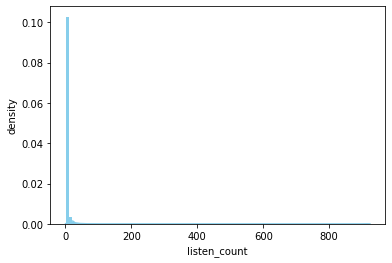

In [55]:
ax = sns.distplot(df['listen_count'],bins=100,kde=True,color='skyblue',hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='listen_count', ylabel='density')

                                                     song  listen_count
116533                           Sehr kosmisch - Harmonia          5043
147890                                      Undo - BjÃ¶rk          4483
160451                     You're The One - Dwight Yoakam          4135
33519   Dog Days Are Over (Radio Edit) - Florence + Th...          3780
110768                            Revelry - Kings Of Leon          3672
116282                              Secrets - OneRepublic          3430
58017   Horn Concerto No. 4 in E flat K495: II. Romanc...          3272
56260                            Hey_ Soul Sister - Train          2791
44103                      Fireflies - Charttraxx Karaoke          2725
143149                                 Tive Sim - Cartola          2668


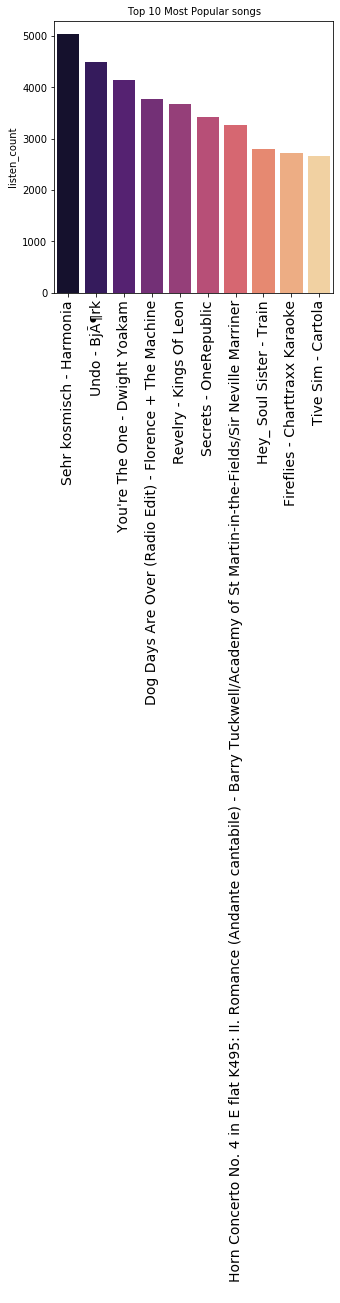

In [56]:
# To calculate popularity of a song, we can aggregate listen_count.


# song_grouped = df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()

x = song_grouped.sort_values(['listen_count', 'song'], ascending =False).head(10)

print(x)
plt.figure(figsize=(5,5))
sns.barplot(x['song'], x['listen_count'], palette = 'magma')
plt.title('Top 10 Most Popular songs', fontsize = 10)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

### Content Based Recommender System


-  Content-based methods gives recommendations based on the similarity of two song contents or attributes

-  Content-based methods are computationally fast and interpretable. Moreover, they can be efficiently adapted to new items or users.  However, one of the biggest limitations of content-based recommendation systems is that the model only learns to recommend items of the same type that the user is already using or, in our case, listening to. Even though this could be helpful, the value of that recommendation is significantly less because it lacks the surprise component of discovering something completely new.

-  The most straightforward approach is keyword matching.

-  In a few words, the idea behind is to extract meaningful keywords present in a song description a user likes, search for the keywords in other song descriptions to estimate similarities among them, and based on that, recommend those songs to the user.

In [57]:
df.head()

,user_id,song_id,listen_count,artist_name,song_name,percentage,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,0.000022,Horn Concerto No. 4 in E flat K495: II. Romanc...
893572,23614884aa75fe96d99a36a775aeda1b531830b2,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero,0.000022,Holding Out For A Hero - Frou Frou
893574,d2e8d8aeb220950b4ddfc7c5e648d439a9965eed,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero,0.000022,Holding Out For A Hero - Frou Frou
893575,ff499594b217036334d3b300e03f9c61ae7b9df9,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero,0.000022,Holding Out For A Hero - Frou Frou
893576,40f25f9031233352e9e9c5d2e52aaae4dafd1ba9,SOFLGUD12A6701F7FD,1,Frou Frou,Holding Out For A Hero,0.000022,Holding Out For A Hero - Frou Frou


-  We are going to use TfidfVectorizer from the Scikit-learn package

In [58]:
df1=df.drop(["artist_name","song_name"] , axis=1 )

### Text Pre-processing

-  In order to convert the text into mathematical representations, we'll use another vectorizer called TF-IDF vectorizer

-  TF = Term Frequency - relative frequency of a word in a document.

(no of repeatation words in a sentence / no of words in a sentence)

-  IDF = Inverse Document Frequency - relative count of the documents containing the term.

log (no of sentences / no of sentences containing words )
-  TF X IDF

In [59]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfv=TfidfVectorizer(min_df=3 , max_features=None,
                   strip_accents = 'unicode' , analyzer = 'word' , token_pattern =r'\w{1,}' ,
                   ngram_range=(1,3) , stop_words="english" )

df1["song"]= df1["song"].fillna('')



In [60]:
tfv_matrix = tfv.fit_transform(df1["song"][:30000])   #not able to take more than 30000 samples

In [61]:
tfv_matrix

<30000x14921 sparse matrix of type '<class 'numpy.float64'>'
	with 284835 stored elements in Compressed Sparse Row format>

In [63]:
tfv_matrix.shape

(30000, 14921)

In [64]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix , tfv_matrix)

In [65]:
sig[0]

array([0.7616223 , 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [66]:
x=[i for i in range(1,137675)]
indices = pd.Series(x , index=df['song_name'].drop_duplicates())
indices[29910:29920]

song_name
Trail Blazer                                29911
Cannibalistic                               29912
F.T.B.                                      29913
Weight Of The World                         29914
Interlude: Livin'...In Complete Darkness    29915
The New Timer                               29916
Eyes Won't Shut                             29917
Choo Choo Train                             29918
Nauseas                                     29919
DNA                                         29920
dtype: int64

In [67]:
sum(indices.value_counts())

137674

In [68]:
def give_rec(release , sig=sig):
    idx=indices[release]
    sig_scores=list(enumerate(sig[idx]))
    sig_scores=sorted(sig_scores,key=lambda x:x[1] , reverse=True)
    sig_scores=sig_scores[1:11]
    
    song_indices=[i[0] for i in sig_scores]
    return df['song_name'].drop_duplicates().iloc[song_indices]
    

In [69]:
give_rec("Comin' For The Datazz (Explicit)")  

IndexError: index 93309 is out of bounds for axis 0 with size 30000